# Gastronomia w latach 2005-2022

<img src="Data\res.webp" alt="Obraz" style="width: 400px;"/>

Gastronomia w latach 2005-2022
Dane Głównego Urzędu Statystycznego (GUS) stanowią kluczowe źródło informacji, w tym projekcie skupimy się na analizie tych danych, aby Zoobrazować jak ewoulował rynek gastronomiczny w polsce i czy populacja oraz zarobki w tej branży zwiększają sie wraz z rosnącą ilością punktów gastronomicznych

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np 
import geopandas as gpd

In [3]:
Restauracje = pd.read_excel(".\Data\Gastronomia.xlsx", sheet_name='Restauracje')
Bary = pd.read_excel(".\Data\Gastronomia.xlsx", sheet_name='Bary')
Stolowki = pd.read_excel(".\Data\Gastronomia.xlsx", sheet_name='Stolowki')
Punkty = pd.read_excel(".\Data\Gastronomia.xlsx", sheet_name='Punkty')
Zarobki = pd.read_excel(".\Data\Zarobki.xlsx")
Ludnosc = pd.read_excel(".\Data\Ludnosc.xlsx")

### Pogdląd danych 

Tutaj możemy zobaczyć część danych, sprawdzić jak są ułożone i co przedstawia plik

In [4]:
Restauracje.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,3386,3510,3673,4150,4252,4625,4447,4806,5264,5615,5587,5917,5600,5034,5837,4970,5191,5444
1,ZACHODNIOPOMORSKIE,124,147,172,193,191,210,172,171,203,218,216,238,227,239,280,230,258,272
2,LUBUSKIE,80,77,97,116,114,107,99,87,91,101,99,130,145,103,124,113,118,109
3,DOLNOŚLĄSKIE,357,281,311,358,392,414,413,420,450,456,491,504,536,480,518,433,470,475
4,WIELKOPOLSKIE,326,383,406,406,371,432,398,403,397,518,497,487,439,386,498,394,375,389


In [5]:
Bary.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,3554,3793,3669,3776,3817,3995,3828,4266,4484,4937,5413,5728,5442,5124,5829,5233,5200,5592
1,ZACHODNIOPOMORSKIE,124,164,158,159,148,163,168,172,214,216,224,247,249,248,284,251,256,285
2,LUBUSKIE,77,80,112,113,107,108,86,80,73,88,105,107,106,70,100,65,66,62
3,DOLNOŚLĄSKIE,187,323,302,340,331,399,430,471,516,607,663,706,774,852,965,901,945,955
4,WIELKOPOLSKIE,275,290,275,228,223,249,233,268,251,298,363,349,289,252,320,228,232,239


In [6]:
Stolowki.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,2640,2471,2460,2077,2028,2088,1898,1982,1880,1839,1863,1889,1812,1744,2011,1542,1711,1772
1,ZACHODNIOPOMORSKIE,135,160,185,155,159,158,147,150,162,180,146,149,143,136,177,120,138,149
2,LUBUSKIE,34,37,31,35,40,42,38,33,28,25,23,35,37,25,29,14,16,16
3,DOLNOŚLĄSKIE,135,119,130,116,119,145,106,136,140,158,138,143,136,154,199,167,163,156
4,WIELKOPOLSKIE,140,171,161,151,154,114,140,153,141,153,145,131,121,95,116,91,84,87


In [7]:
Punkty.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,2292,2449,2506,3066,3208,3700,3713,4083,4179,4934,5748,6089,6271,5798,6583,6033,6687,7407
1,ZACHODNIOPOMORSKIE,70,106,120,126,132,115,106,73,111,107,125,144,192,173,198,154,253,230
2,LUBUSKIE,34,35,40,22,37,40,28,39,44,45,71,105,81,62,63,38,59,48
3,DOLNOŚLĄSKIE,100,116,141,161,154,261,269,277,235,260,290,273,289,298,262,223,296,269
4,WIELKOPOLSKIE,88,112,84,147,149,173,122,179,197,262,627,581,323,257,389,293,370,367


In [8]:
Ludnosc.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,38157.06,38125.48,38115.64,38135.88,38167.33,38529.87,38538.45,38533.30,38495.66,38478.60,38437.24,38432.99,38433.56,38411.15,38382.58,38088.56,37907.70,37766.33
1,ZACHODNIOPOMORSKIE,1694.18,1692.84,1692.27,1692.96,1693.20,1723.74,1722.74,1721.41,1718.86,1715.43,1710.48,1708.17,1705.53,1701.03,1696.19,1661.07,1650.02,1640.62
2,LUBUSKIE,1009.20,1008.52,1008.48,1008.96,1010.05,1023.22,1023.16,1023.32,1021.47,1020.31,1018.08,1017.38,1016.83,1014.55,1011.59,993.33,985.49,979.98
3,DOLNOŚLĄSKIE,2888.23,2882.32,2878.41,2877.06,2876.63,2917.24,2916.58,2914.36,2910.00,2908.46,2904.21,2903.71,2902.55,2901.23,2900.16,2908.38,2897.74,2888.03
4,WIELKOPOLSKIE,3372.42,3378.50,3386.88,3397.62,3408.28,3446.75,3455.48,3462.20,3467.02,3472.58,3475.32,3481.63,3489.21,3493.97,3498.73,3507.04,3500.03,3493.58


In [9]:
Zarobki.head()

,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,POLSKA,5438968,6253778,7218859,8231213,9455578,10495321,11172840,12291420,12992596.8,14426994.4,16037113.8,18738083.9,20790997.8,22423795.4,26001794.8,17788609.1,24975178.6,34699196.0
1,DOLNOŚLĄSKIE,705571,799774,1004248,1174194,1427131,1536657,1736581,1931888,2126114.8,2385851.0,2608736.3,2975827.2,3356540.4,3713198.3,4436931.2,3279678.1,4471655.3,5826803.1
2,KUJAWSKO-POMORSKIE,116687,153472,188429,216166,320114,356743,352907,364025,413546.2,414948.5,503477.2,628051.2,656592.7,662045.9,652497.3,434213.5,610875.8,1080970.7
3,LUBELSKIE,119140,138766,153063,157368,183247,203436,210301,246307,254384.0,242535.6,284463.2,366147.4,355409.8,404642.2,484448.4,356771.0,471206.0,659615.6
4,LUBUSKIE,87677,113034,144467,166300,157256,157887,157603,150945,148503.6,150076.6,176173.1,238834.8,281084.6,279781.8,333247.6,264935.7,355936.6,497333.9


### Czy wszystkie punkty gastronomiczne rozwijają się równomiernie?

Aby zobaczyć czy restauracje, bary, stołówki i punkty gastronomiczne takie jak zapiekanki jednakowo się rozwijają, przedstawimy ich bazę w formie wykresu na przestrzeni lat

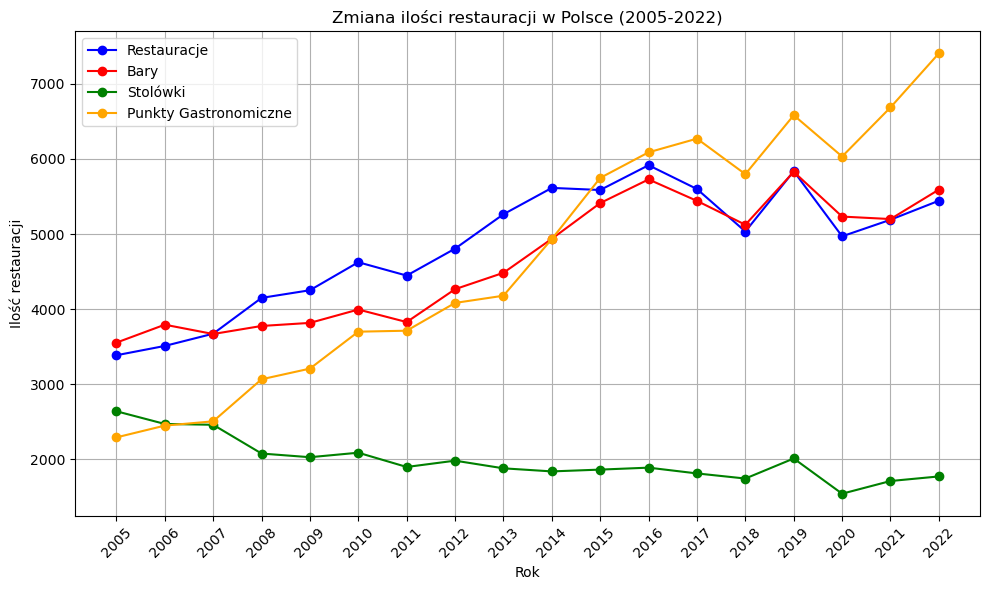

In [10]:
Polska_restauracje = Restauracje[Restauracje['Nazwa'] == 'POLSKA'].iloc[:, 1:]
Polska_bary = Bary[Bary['Nazwa'] == 'POLSKA'].iloc[:, 1:]
Polska_stolowki = Stolowki[Stolowki['Nazwa'] == 'POLSKA'].iloc[:, 1:]
Polska_punkty = Punkty[Punkty['Nazwa'] == 'POLSKA'].iloc[:, 1:]

plt.figure(figsize=(10, 6))
plt.plot(Polska_restauracje.columns, Polska_restauracje.iloc[0], marker='o', linestyle='-', color='blue')
plt.plot(Polska_bary.columns, Polska_bary.iloc[0], marker='o', linestyle='-', color='red')
plt.plot(Polska_stolowki.columns, Polska_stolowki.iloc[0], marker='o', linestyle='-', color='green')
plt.plot(Polska_punkty.columns, Polska_punkty.iloc[0], marker='o', linestyle='-', color='orange')
plt.legend(['Restauracje', 'Bary', 'Stolówki', 'Punkty Gastronomiczne'])
plt.title('Zmiana ilości restauracji w Polsce (2005-2022)')
plt.xlabel('Rok')
plt.ylabel('Ilość restauracji')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Może zauważyć, że największą furorę robię punkty gastronomiczne, zaczynając od najmniejszej ilości placówek ze wszystkich wymionnych przez 17 lat plasują się na pierwszym miejscu, świadczy to o preferencjach ludzi, w dzisiejszych czasach wszyscy się śpieszą i dużo częściej wezmą coś na szybko z takiego punktu niż usiądą w restauracji i zjedzą obiad.

Natomiast stołówki, chociaż nigdy nie były popularne na przestrzeni lat można zauważyć ich powolny upadek

Bary i restauracje rozwijały się przez ten okres bardzo podobnie


### Czy zarobki w branży gastronomicznej utrzymują się wzgledem ilości lokali?

Jeśli ludność w polsce przez te 3 lata wzrosła o 3 miliony co daje nam 7% mieszkańców polski na rok 2022, to tak gwałtowny wzrost ilości placówek bo aż 40% placówek na rok 2022 pojawiło się na przestrzeni tych lat, to mogłoby się wydawać, że każda placówka powina mieć o wiele mniej klientów, a zarobki podobne względem tyh z 2005, aby to sprawdzić, porównamy te dane i przedstawimy na wykresie.


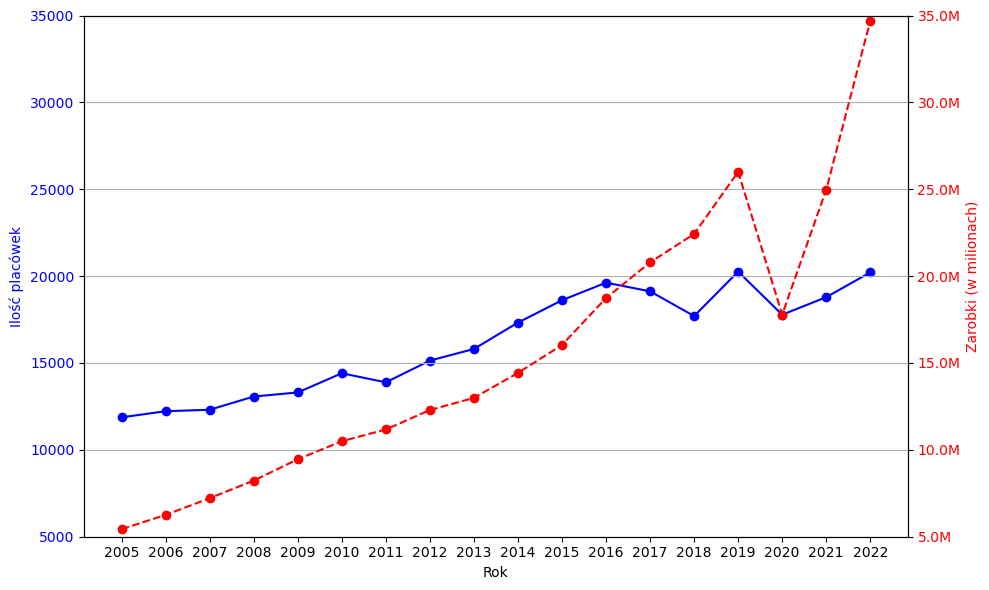

In [15]:
Zarobki_Polska = Zarobki[Zarobki['Nazwa'] == 'POLSKA'].iloc[:, 1:]
Polska_restauracje = Restauracje[Restauracje['Nazwa'] == 'POLSKA'].iloc[:, 1:]

Suma_placowek = Polska_restauracje.iloc[0] + Polska_bary.iloc[0] + Polska_stolowki.iloc[0] + Polska_punkty.iloc[0]
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Polska_restauracje.columns, Suma_placowek, marker='o', linestyle='-', color='blue')
ax.set_xlabel('Rok')
ax.set_ylabel('Ilość placówek', color='blue')
ax.tick_params(axis='y', labelcolor='blue')


ax2 = ax.twinx()

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

ax2.yaxis.set_major_formatter(FuncFormatter(millions))

ax2.set_ylabel('Zarobki (w milionach)', color='red')
ax2.plot(Zarobki_Polska.columns, Zarobki_Polska.iloc[0], color='red', marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_ylim(5000, 35000)
ax2.set_ylim(5000000, 35000000)

plt.grid(True)
fig.tight_layout()
plt.show()

Jak można zauważyć zarobki w gastronomii tak samo jak ilość placówek mają ogólną tendencję wzrostową, jedynie w roku 2020 podobnie jak ilość placówek zaliczają ogromny spadek, wynika to z pandemii covid, przez którą ludzie rzadziej chodzili do restauracji co za tym idzie wiele takich placówek musiało zamknąć swój interes.

W latach 2020-2022 widzimy drastyczny wzrost zarobków na rynku gastronomicznym, może wynikać to z kwestii takich jak podwyższenie płacy minimalnej i ogólnego wzrostu inflacji oraz odbudowy rynku po pandemii, przez te trzy powody, ceny posiłków bardzo mocno poszły w górę, więc zarobki zwiększają się bardzo szybko

#### Jak rozkłada się ilość lokali w województwach Polski?

Korzystając z danych oraz możemy stworzyć heatmapę pokazująco ilość lokali w województwach

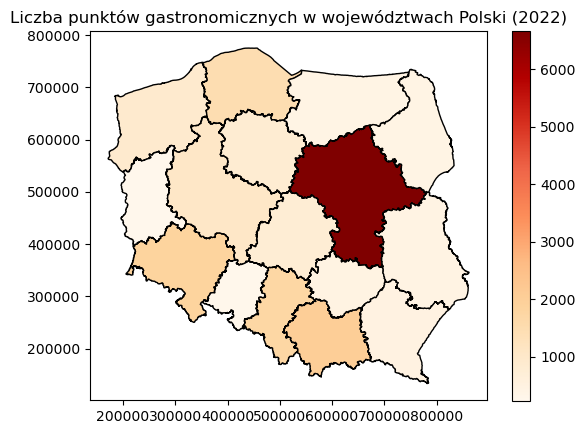

In [16]:
mapa_polski = gpd.read_file('./Data/wojewodztwa.shp')

dane = gpd.read_file("./Data/wojewodztwa.shp")

Wojewodztwa = Punkty['Nazwa'][1:]
Suma_placowek_2022 = Punkty.iloc[1:, 18:].sum(axis=1) + Restauracje.iloc[1:, 18:].sum(axis=1) + Bary.iloc[1:, 18:].sum(axis=1) + Stolowki.iloc[1:, 18:].sum(axis=1)
Suma_placowek_2022 = pd.DataFrame({'Województwo': Wojewodztwa, 'LiczbaPunktów': Suma_placowek_2022})
Suma_placowek_2022['Województwo'] = Suma_placowek_2022['Województwo'].str.lower()

mapa_polski = mapa_polski.set_index('JPT_NAZWA_').join(Suma_placowek_2022.set_index('Województwo'))

mapa_polski.plot(column='LiczbaPunktów', cmap='OrRd', legend=True, edgecolor='black')

plt.title('Liczba punktów gastronomicznych w województwach Polski (2022)')
plt.show()

Można bardzo łatwo zoobserwować że najwięcej placówek znajduje się w województwie mazowieckim, co nikogo nie powinno dziwić ze względu na największą liczbę mieszkańców oraz największą ilość turystów ze wszystkich województw

Inne województwa z bardzo wysoką ilością placówek to 

dolnośląskie, śląskie i małopolskie: duża ilość turystów oraz topowe województwo pod względem ilości mieszkanców


### Ludność a placówki gastronomiczne

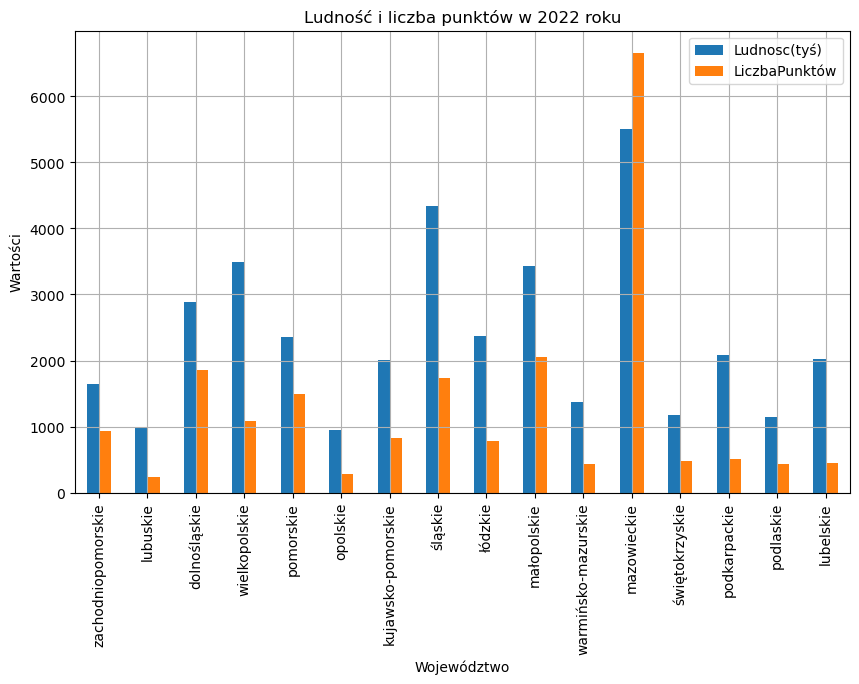

In [19]:


Ludnosc_2022 = Ludnosc.iloc[1:, 18:].sum(axis=1)
Ludnosc_2022 = pd.DataFrame({'Województwo': Wojewodztwa, 'Ludnosc(tyś)': Ludnosc_2022})
Ludnosc_2022['Województwo'] = Ludnosc_2022['Województwo'].str.lower()



dane_do_wykresu = pd.merge(Ludnosc_2022, Suma_placowek_2022, on='Województwo')


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))
dane_do_wykresu.plot(x='Województwo', y=['Ludnosc(tyś)', 'LiczbaPunktów'], kind='bar', ax=ax)
ax.set_title('Ludność i liczba punktów w 2022 roku')
ax.set_xlabel('Województwo')
ax.set_ylabel('Wartości')
plt.grid(True)
plt.show()





      

    

    


Możemy zauważyć że w województwie mazowiecki jako jedynym liczba punktów przywyższa ilość mieszkańców( podanych w tysiącach) wynika to z wysoko rozwiniętej urbanizacji tego województwa, dużym skupisku działalności gospodarczych oraz wysoko rozwiniętej turystyki

